<a href="https://colab.research.google.com/github/Krishnamakw/Calculator_Project/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def print_all(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name}")
        print(obj[()])
    elif isinstance(obj, h5py.Group):
        print(f"Group: {name}")

file = h5py.File('/content/drive/MyDrive/sac/3RIMG_26FEB2025_0015_L1B_STD_V01R00.h5', 'r')
file.visititems(print_all)

Dataset: GeoX
[   0    1    2 ... 2802 2803 2804]
Dataset: GeoX1
[   0    1    2 ... 1399 1400 1401]
Dataset: GeoX2
[    0     1     2 ... 11217 11218 11219]
Dataset: GeoY
[   0    1    2 ... 2813 2814 2815]
Dataset: GeoY1
[   0    1    2 ... 1405 1406 1407]
Dataset: GeoY2
[    0     1     2 ... 11261 11262 11263]
Dataset: GreyCount
[   0    1    2 ... 1021 1022 1023]
Dataset: IMG_MIR
[[[1023 1023 1023 ... 1023 1023 1023]
  [1023 1023 1023 ... 1023 1023 1023]
  [1023 1023 1023 ... 1023 1023 1023]
  ...
  [1023 1023 1023 ... 1023 1023 1023]
  [1023 1023 1023 ... 1023 1023 1023]
  [1023 1023 1023 ... 1023 1023 1023]]]
Dataset: IMG_MIR_RADIANCE
[0.348548 0.348196 0.347844 ... 0.       0.       0.      ]
Dataset: IMG_MIR_TEMP
[339.78748 339.78748 339.78748 ... 179.69302 179.69302 179.69302]
Dataset: IMG_SWIR
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Dataset: IMG_SWIR_RADIANCE
[0.  0.  0.  ... 6.7 6.7 6.7]

In [4]:
def show_images(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"Dataset found: {name}")

        data = obj[()]  # load the data

        # If it's 2D (an image), show it
        if data.ndim == 2:
            plt.imshow(data, cmap='gray')  # or 'hot', 'viridis' depending on image
            plt.title(name)
            plt.colorbar()
            plt.show()

        # If it's 3D (like stack of images), show first slice
        elif data.ndim == 3:
            plt.imshow(data[0], cmap='gray')
            plt.title(name + ' [0]')
            plt.colorbar()
            plt.show()

file = h5py.File('/content/drive/MyDrive/sac/3RIMG_26FEB2025_0015_L1B_STD_V01R00.h5', 'r')
# file.visititems(show_images)

(1, 2816, 2805)


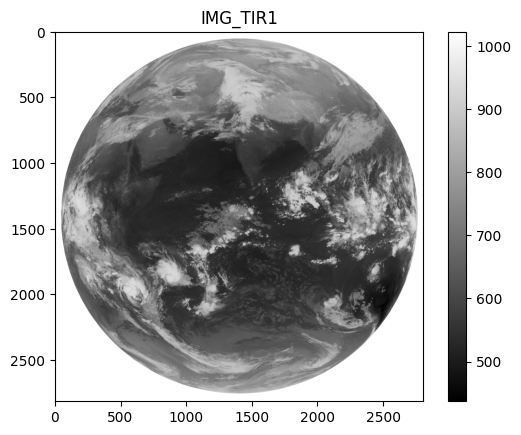

Main Image Matrix (Top-left 10x10):
[[1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]
 [1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]
 [1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]
 [1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]
 [1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]
 [1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]
 [1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]
 [1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]
 [1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]
 [1023 1023 1023 1023 1023 1023 1023 1023 1023 1023]]


In [5]:
f = h5py.File('/content/drive/MyDrive/sac/3RIMG_26FEB2025_0015_L1B_STD_V01R00.h5', 'r')

# Access the dataset
dset = f['IMG_TIR1']

# Check the shape
print(dset.shape)  # Example: (1, 512, 512)

# Load the first image
img = dset[0]  # First image (index 0)

# Show the image
plt.imshow(img, cmap='gray')  # or cmap='hot', 'jet', etc
plt.title('IMG_TIR1')
plt.colorbar()
plt.show()

print("Main Image Matrix (Top-left 10x10):")
print(img[:10, :10])

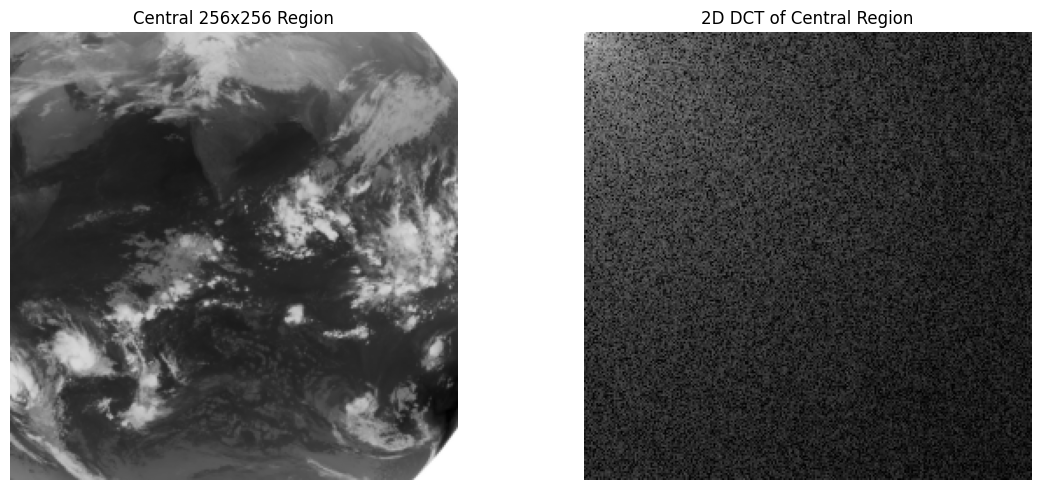

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fftpack import dct

# Load the image in grayscale
image_path = "/content/drive/MyDrive/sac/A.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the center of the image
h, w = image.shape
center_h, center_w = h // 2, w // 2

# Extract the central 256x256 region
half_size = 128
central_region = image[center_h - half_size:center_h + half_size, center_w - half_size:center_w + half_size]

# Apply 2D DCT
dct_2d = dct(dct(central_region.T, norm='ortho').T, norm='ortho')

# Display the central region and its DCT
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Central 256x256 Region")
plt.imshow(central_region, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("2D DCT of Central Region")
plt.imshow(np.log1p(np.abs(dct_2d)), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


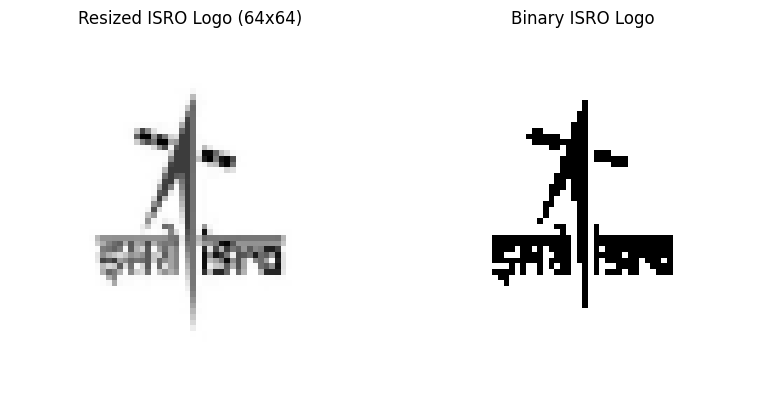

In [7]:
# Load the ISRO logo
logo_path = "/content/drive/MyDrive/sac/isro.jpg"
logo_image = cv2.imread(logo_path, cv2.IMREAD_GRAYSCALE)

# Resize to 64x64
logo_resized = cv2.resize(logo_image, (64, 64), interpolation=cv2.INTER_AREA)

# Convert to binary (black and white) using Otsu's thresholding
_, logo_binary = cv2.threshold(logo_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the resized and binary image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Resized ISRO Logo (64x64)")
plt.imshow(logo_resized, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary ISRO Logo")
plt.imshow(logo_binary, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


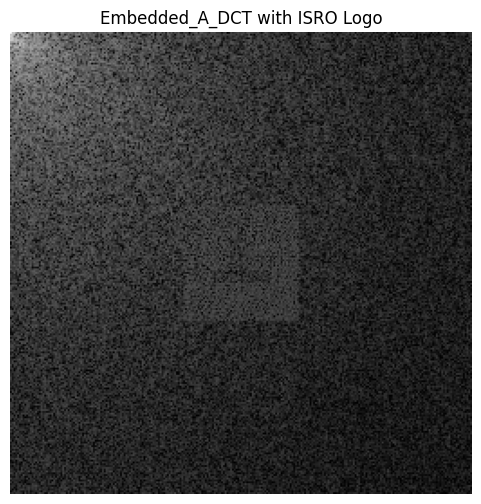

In [8]:
# Create a copy of the DCT of the central region to embed the watermark
embedded_A_DCT = np.copy(dct_2d)

# Normalize binary logo values to [-10, 10] for visible embedding (optional strength factor)
embedding_strength = 10
logo_binary_normalized = (logo_binary // 255) * embedding_strength  # 0 or 10

# Find center of the DCT image
center_y, center_x = embedded_A_DCT.shape[0] // 2, embedded_A_DCT.shape[1] // 2

# Embed logo into middle frequency components of DCT
start_y = center_y - 32
start_x = center_x - 32

embedded_A_DCT[start_y:start_y+64, start_x:start_x+64] += logo_binary_normalized

# Display the modified DCT
plt.figure(figsize=(6, 6))
plt.title("Embedded_A_DCT with ISRO Logo")
plt.imshow(np.log1p(np.abs(embedded_A_DCT)), cmap='gray')
plt.axis('off')
plt.show()


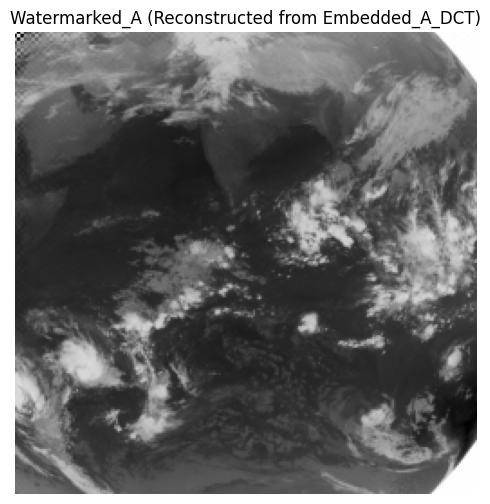

In [26]:
# Apply 2D inverse DCT to reconstruct the image from Embedded_A_DCT
watermarked_A = idct(idct(embedded_A_DCT.T, norm='ortho').T, norm='ortho')

# Clip values to valid grayscale range [0, 255] and convert to uint8
watermarked_A_uint8 = np.clip(watermarked_A, 0, 255).astype(np.uint8)

# Display the reconstructed (watermarked) image
plt.figure(figsize=(6, 6))
plt.title("Watermarked_A (Reconstructed from Embedded_A_DCT)")
plt.imshow(watermarked_A_uint8, cmap='gray')
plt.axis('off')
plt.show()


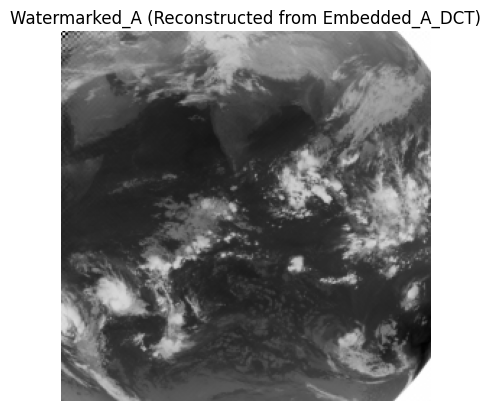

In [27]:
from scipy.fftpack import idct
import numpy as np
import matplotlib.pyplot as plt

# Inverse 2D DCT to reconstruct the watermarked image
watermarked_A = idct(idct(embedded_A_DCT.T, norm='ortho').T, norm='ortho')

# Clip and convert to uint8
watermarked_A_uint8 = np.clip(watermarked_A, 0, 255).astype(np.uint8)

# Display the watermarked image
plt.imshow(watermarked_A_uint8, cmap='gray')
plt.title("Watermarked_A (Reconstructed from Embedded_A_DCT)")
plt.axis('off')
plt.show()


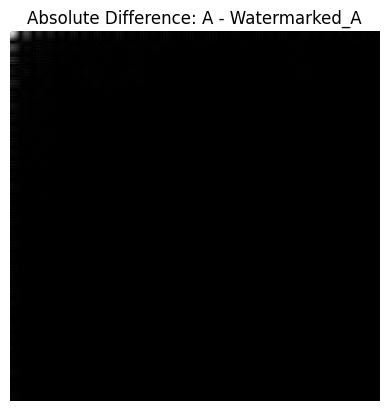

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Convert both images to int16 to handle negative differences correctly
original_A = central_region.astype(np.int16)
watermarked_A = watermarked_A_uint8.astype(np.int16)

# Compute the pixel-wise difference
difference = original_A - watermarked_A

# Display the absolute difference
plt.imshow(np.abs(difference), cmap='gray')
plt.title("Absolute Difference: A - Watermarked_A")
plt.axis('off')
plt.show()


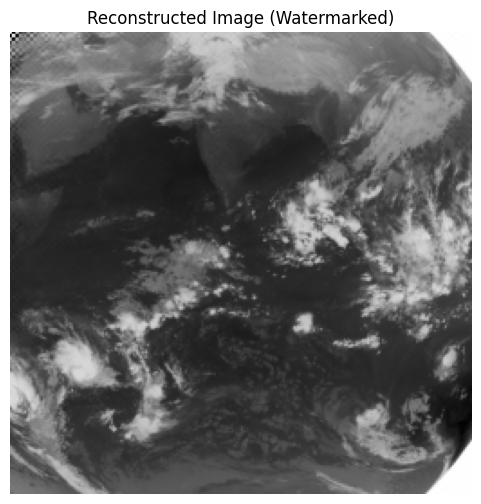

In [9]:
from scipy.fftpack import idct

# Apply 2D inverse DCT to reconstruct the image from Embedded_A_DCT
inverse_dct = idct(idct(embedded_A_DCT.T, norm='ortho').T, norm='ortho')

# Clip values to valid grayscale range [0, 255] and convert to uint8
watermarked_image = np.clip(inverse_dct, 0, 255).astype(np.uint8)

# Display the reconstructed (watermarked) image
plt.figure(figsize=(6, 6))
plt.title("Reconstructed Image (Watermarked)")
plt.imshow(watermarked_image, cmap='gray')
plt.axis('off')
plt.show()


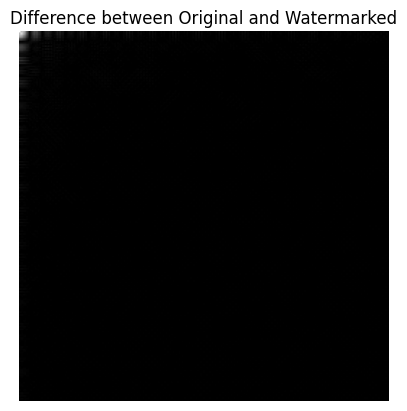

In [10]:
# 'central_region' is the original 256x256 region
# 'watermarked_image' is the result after inverse DCT of Embedded_A_DCT

difference = central_region.astype(np.int16) - watermarked_image.astype(np.int16)

# Optional: visualize the absolute difference
import matplotlib.pyplot as plt
plt.imshow(np.abs(difference), cmap='gray')
plt.title("Difference between Original and Watermarked")
plt.axis('off')
plt.show()


In [11]:
import numpy as np

# Convert images to float
original = central_region.astype(np.float64)
watermarked = watermarked_image.astype(np.float64)

# Signal Power: sum of squares of original image
signal_power = np.sum(original ** 2)

# Error Power: sum of squares of difference
error_power = np.sum((original - watermarked) ** 2)

# Avoid division by zero
if error_power == 0:
    spdr = float('inf')
else:
    spdr = 10 * np.log10(signal_power / error_power)

print(f"Signal Power to Difference Power Ratio (SPDR): {spdr:.2f} dB")


Signal Power to Difference Power Ratio (SPDR): 32.26 dB


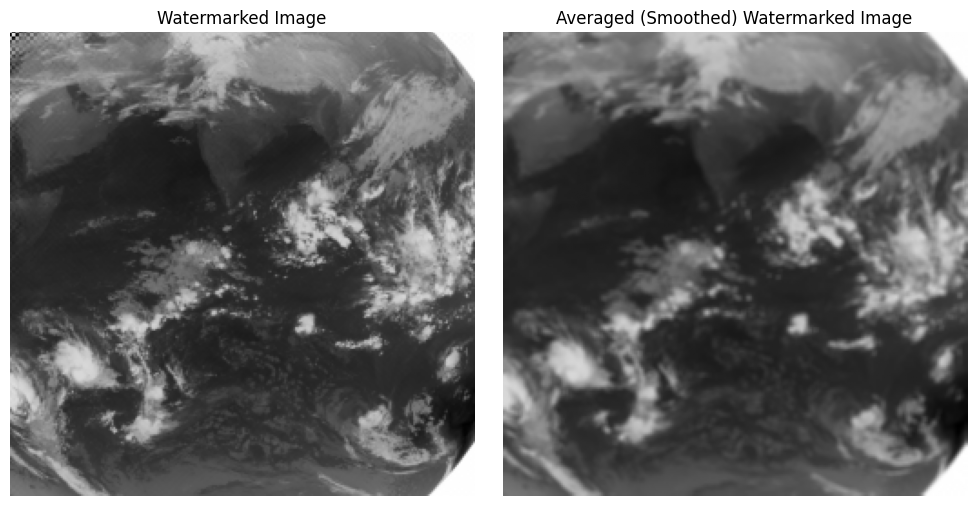

In [12]:
import cv2
import matplotlib.pyplot as plt

# Apply 3x3 averaging filter on the watermarked image
smoothed_watermarked = cv2.blur(watermarked_image, (3, 3))

# Display original watermarked and smoothed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Watermarked Image")
plt.imshow(watermarked_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Averaged (Smoothed) Watermarked Image")
plt.imshow(smoothed_watermarked, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


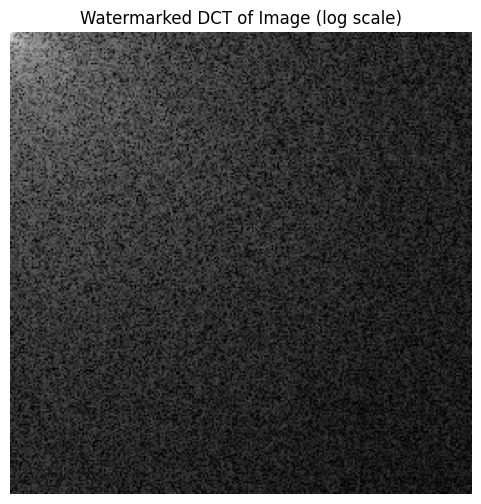

In [19]:
import matplotlib.pyplot as plt
from scipy.fftpack import dct

# 1. Define watermark strength (embedding scale)
watermark_strength = 0.01  # adjust this value; higher means stronger logo visibility

# Calculate the DCT of the central region (assuming dct_2d is available from a previous cell)
# If dct_2d is not available, you would need to recalculate it from central_region
if 'dct_2d' not in locals():
    print("Warning: 'dct_2d' not found. Recalculating DCT of central_region.")
    # Assuming 'central_region' is also available
    if 'central_region' in locals():
        top_left_dct = dct(dct(central_region.T, norm='ortho').T, norm='ortho')
    else:
        raise NameError("Neither 'dct_2d' nor 'central_region' found. Cannot proceed.")
else:
    top_left_dct = dct_2d # Use the existing dct_2d

# Calculate the 2D DCT of the binary logo (assuming logo_binary is available)
if 'logo_binary' not in locals():
     raise NameError("'logo_binary' not found. Cannot proceed.")

logo_dct = dct(dct(logo_binary.T, norm='ortho').T, norm='ortho')


# 2. Embed logo's DCT into top-left corner of main image's DCT matrix
#    (low-frequency coefficients)
top_left_dct_embedded = top_left_dct.copy()  # copy to avoid modifying original
h, w = logo_dct.shape
# Ensure the logo DCT fits into the top-left corner of the image DCT
embed_h = min(h, top_left_dct_embedded.shape[0])
embed_w = min(w, top_left_dct_embedded.shape[1])

top_left_dct_embedded[:embed_h, :embed_w] += watermark_strength * logo_dct[:embed_h, :embed_w]

# 3. Visualize the modified DCT (with embedded logo)
plt.figure(figsize=(6,6))
plt.imshow(np.log(np.abs(top_left_dct_embedded) + 1), cmap='gray')
plt.title('Watermarked DCT of Image (log scale)')
plt.axis('off')
plt.show()

central_region shape: (256, 256)
reconstructed_img shape: (256, 256)
logo_dct shape: (64, 64)


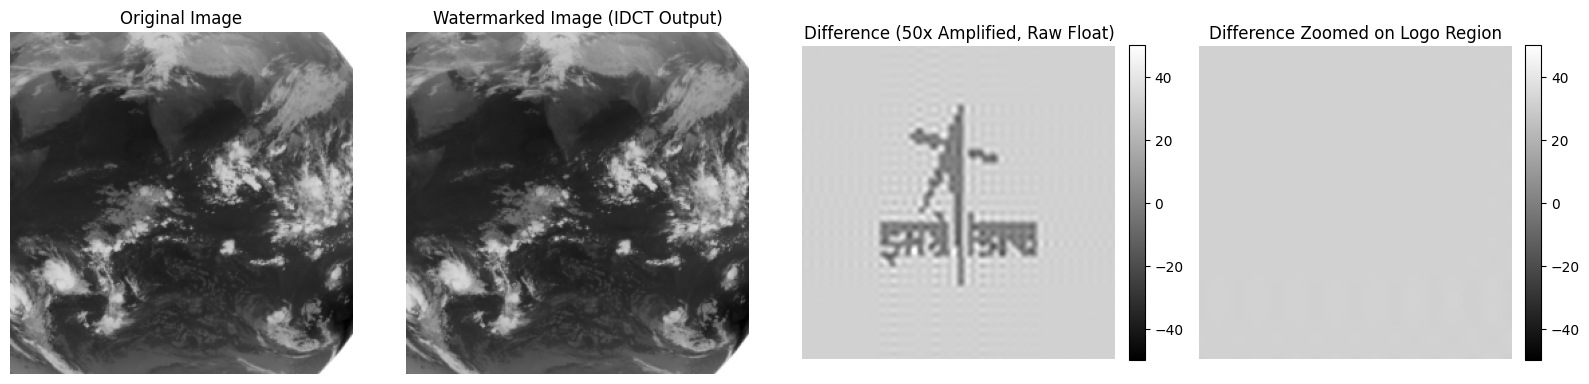

In [23]:
from scipy.fftpack import idct

# Perform inverse DCT on the embedded DCT to get the watermarked image
reconstructed_img = idct(idct(top_left_dct_embedded.T, norm='ortho').T, norm='ortho')

# Debug prints to check shapes
print(f"central_region shape: {central_region.shape}")
print(f"reconstructed_img shape: {reconstructed_img.shape}")
print(f"logo_dct shape: {logo_dct.shape}")

# Compute amplified difference on raw float images
difference_float = 50 * (reconstructed_img - central_region)  # Increased amplification to 50x

# Calculate logo size in pixels assuming logo_dct shape is in pixels already
logo_pixels_h, logo_pixels_w = logo_dct.shape  # No multiplication by block size here

# Crop difference around top-left corner where logo is embedded
difference_zoom = difference_float[:logo_pixels_h, :logo_pixels_w]

# Plot the comparison with zoomed difference
plt.figure(figsize=(16, 6))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(central_region, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Watermarked Image
plt.subplot(1, 4, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Watermarked Image (IDCT Output)')
plt.axis('off')

# Difference (Amplified, raw float)
plt.subplot(1, 4, 3)
plt.imshow(difference_float, cmap='gray', vmin=-50, vmax=50)
plt.title('Difference (50x Amplified, Raw Float)')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

# Zoomed Difference on Logo Region
plt.subplot(1, 4, 4)
plt.imshow(difference_zoom, cmap='gray', vmin=-50, vmax=50)
plt.title('Difference Zoomed on Logo Region')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
def calculate_psnr(original, watermarked):
    mse = np.mean((original - watermarked) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

psnr = calculate_psnr(central_region, reconstructed_img)
print(f"PSNR: {psnr:.2f} dB")

PSNR: 52.37 dB


In [30]:
from skimage.metrics import structural_similarity as ssim

def clip_img(img):
    """Clips image values to 0-255 and converts to uint8."""
    return np.clip(img, 0, 255).astype(np.uint8)

original_uint8 = clip_img(central_region)
watermarked_uint8 = clip_img(reconstructed_img)

# Compute SSIM
ssim_val = ssim(original_uint8, watermarked_uint8, data_range=255)
print(f"SSIM: {ssim_val:.4f}")

SSIM: 0.9999


In [31]:
import numpy as np

# Convert to float for precision
A = central_region.astype(np.float64)
A_w = watermarked_A_uint8.astype(np.float64)

# Compute signal power and difference (error) power
signal_power = np.sum(A ** 2)
error_power = np.sum((A - A_w) ** 2)

# Compute SPDR
if error_power == 0:
    spdr = float('inf')  # No distortion
else:
    spdr = 10 * np.log10(signal_power / error_power)

print(f"Signal Power to Difference Power Ratio (SPDR): {spdr:.2f} dB")


Signal Power to Difference Power Ratio (SPDR): 32.26 dB


In [32]:
import numpy as np
import cv2

# Add Gaussian noise (mean=0, std=5)
noise = np.random.normal(0, 5, watermarked_A_uint8.shape)
noisy_image = watermarked_A_uint8.astype(np.float32) + noise

# Clip to valid range and convert back to uint8
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)


In [33]:
smoothed_noisy_image = cv2.blur(noisy_image, (3, 3))


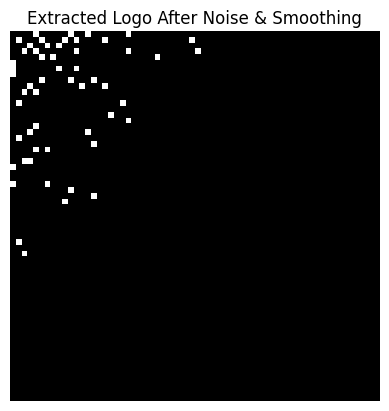

In [34]:
from scipy.fftpack import dct
import matplotlib.pyplot as plt

# 2D DCT
dct_perturbed = dct(dct(smoothed_noisy_image.T, norm='ortho').T, norm='ortho')

# Extract embedded region (64x64)
center_y, center_x = dct_perturbed.shape[0] // 2, dct_perturbed.shape[1] // 2
start_y, start_x = center_y - 32, center_x - 32
extracted_dct_region = dct_perturbed[start_y:start_y+64, start_x:start_x+64]

# Reconstruct binary logo using threshold
threshold = 5
reconstructed_logo = (extracted_dct_region > threshold).astype(np.uint8) * 255

# Display
plt.imshow(reconstructed_logo, cmap='gray')
plt.title("Extracted Logo After Noise & Smoothing")
plt.axis('off')
plt.show()


In [35]:
# Assume original logo was called: logo_binary (values 0 or 255)
original_logo_bits = (logo_binary // 255).astype(np.uint8)
extracted_logo_bits = (reconstructed_logo // 255).astype(np.uint8)

# Calculate Bit Error Rate
bit_errors = np.sum(original_logo_bits != extracted_logo_bits)
total_bits = original_logo_bits.size
ber = bit_errors / total_bits

print(f"Bit Error Rate (BER): {ber:.4f} ({bit_errors} errors out of {total_bits} bits)")


Bit Error Rate (BER): 0.9138 (3743 errors out of 4096 bits)


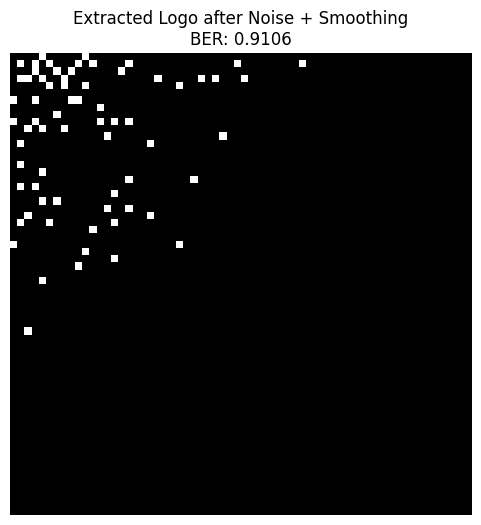


Bit Error Rate (BER): 0.9106 (3730 errors out of 4096 bits)


In [36]:
import numpy as np
import cv2
from scipy.fftpack import dct
import matplotlib.pyplot as plt

# ---------- Step 1: Add Gaussian Noise ----------
# (Assumes `watermarked_A_uint8` is already defined)
noise = np.random.normal(0, 5, watermarked_A_uint8.shape)
noisy_image = watermarked_A_uint8.astype(np.float32) + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# ---------- Step 2: Apply Averaging (Smoothing) ----------
smoothed_noisy_image = cv2.blur(noisy_image, (3, 3))

# ---------- Step 3: 2D DCT of Smoothed Image ----------
dct_perturbed = dct(dct(smoothed_noisy_image.T, norm='ortho').T, norm='ortho')

# Extract 64x64 middle frequencies (embedded region)
center_y, center_x = dct_perturbed.shape[0] // 2, dct_perturbed.shape[1] // 2
start_y, start_x = center_y - 32, center_x - 32
extracted_dct_region = dct_perturbed[start_y:start_y+64, start_x:start_x+64]

# ---------- Step 4: Reconstruct the Logo ----------
threshold = 5  # based on embedding strength
reconstructed_logo = (extracted_dct_region > threshold).astype(np.uint8) * 255

# ---------- Step 5: Calculate Bit Error Rate (BER) ----------
# (Assumes original binary logo is `logo_binary`)
original_logo_bits = (logo_binary // 255).astype(np.uint8)
extracted_logo_bits = (reconstructed_logo // 255).astype(np.uint8)

bit_errors = np.sum(original_logo_bits != extracted_logo_bits)
total_bits = original_logo_bits.size
ber = bit_errors / total_bits

# ---------- Step 6: Display Result ----------
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_logo, cmap='gray')
plt.title(f"Extracted Logo after Noise + Smoothing\nBER: {ber:.4f}")
plt.axis('off')
plt.show()

print(f"\nBit Error Rate (BER): {ber:.4f} ({bit_errors} errors out of {total_bits} bits)")


In [37]:
import numpy as np

# Convert images to float64
A = central_region.astype(np.float64)
A_p = smoothed_noisy_image.astype(np.float64)

# Compute signal and error power
signal_power = np.sum(A ** 2)
error_power = np.sum((A - A_p) ** 2)

# Compute SPDR
if error_power == 0:
    spdr = float('inf')  # Perfect match
else:
    spdr = 10 * np.log10(signal_power / error_power)

print(f"Signal Power to Difference Power Ratio (SPDR): {spdr:.2f} dB")


Signal Power to Difference Power Ratio (SPDR): 22.76 dB


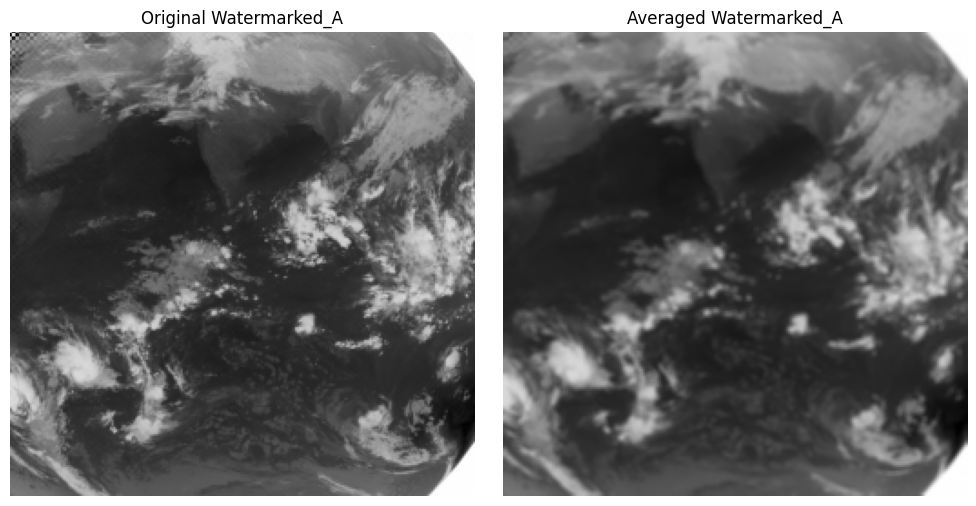

In [38]:
import cv2
import matplotlib.pyplot as plt

# Apply 3x3 averaging filter on the Watermarked_A image
averaged_watermarked_A = cv2.blur(watermarked_A_uint8, (3, 3))

# Display the original watermarked and averaged images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Watermarked_A")
plt.imshow(watermarked_A_uint8, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Averaged Watermarked_A")
plt.imshow(averaged_watermarked_A, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


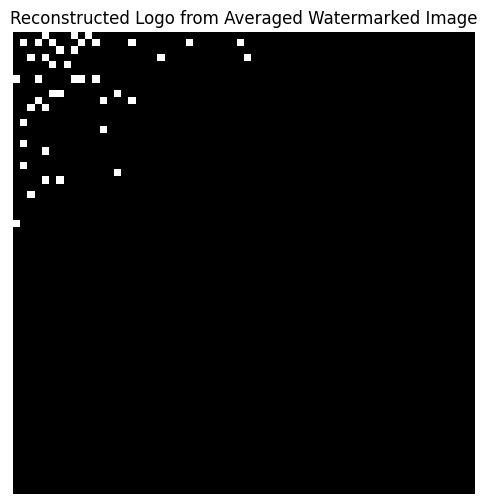

In [39]:
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import numpy as np

# ---------- Step 1: Apply 2D DCT on the perturbed image ----------
dct_perturbed = dct(dct(averaged_watermarked_A.T, norm='ortho').T, norm='ortho')

# ---------- Step 2: Extract 64x64 middle frequency region ----------
center_y, center_x = dct_perturbed.shape[0] // 2, dct_perturbed.shape[1] // 2
start_y, start_x = center_y - 32, center_x - 32
extracted_dct_region = dct_perturbed[start_y:start_y+64, start_x:start_x+64]

# ---------- Step 3: Threshold to reconstruct binary logo ----------
threshold = 5  # Based on embedding strength (e.g., 10)
reconstructed_logo = (extracted_dct_region > threshold).astype(np.uint8) * 255

# ---------- Step 4: Display the extracted logo ----------
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_logo, cmap='gray')
plt.title("Reconstructed Logo from Averaged Watermarked Image")
plt.axis('off')
plt.show()


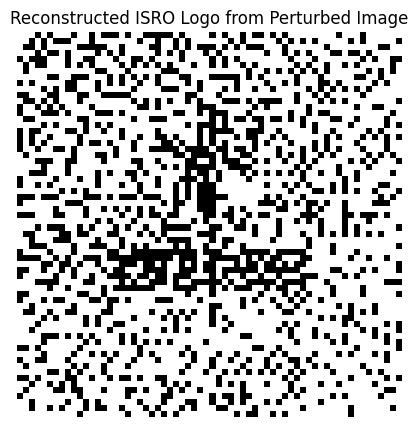

In [40]:
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply 2D DCT on the averaged watermarked image
dct_perturbed = dct(dct(watermarked_A_uint8.T, norm='ortho').T, norm='ortho')

# Step 2: Extract 64x64 middle frequency region
center_y, center_x = dct_perturbed.shape[0] // 2, dct_perturbed.shape[1] // 2
start_y, start_x = center_y - 32, center_x - 32
extracted_dct_region = dct_perturbed[start_y:start_y+64, start_x:start_x+64]

# Step 3: Reconstruct binary logo using threshold
threshold = 5  # Based on embedding strength
reconstructed_logo = (extracted_dct_region > threshold).astype(np.uint8) * 255

# Step 4: Display the extracted logo
plt.figure(figsize=(5, 5))
plt.imshow(reconstructed_logo, cmap='gray')
plt.title("Reconstructed ISRO Logo from Perturbed Image")
plt.axis('off')
plt.show()


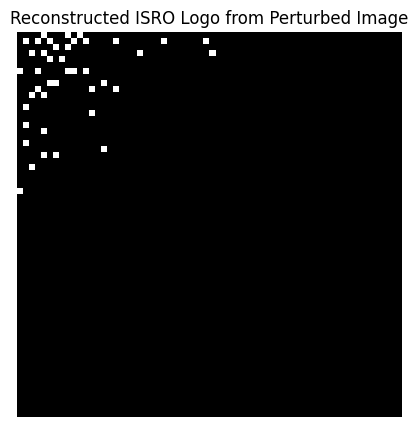

In [41]:
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply 2D DCT on the averaged watermarked image
dct_perturbed = dct(dct(averaged_watermarked_A.T, norm='ortho').T, norm='ortho')

# Step 2: Extract 64x64 middle frequency region
center_y, center_x = dct_perturbed.shape[0] // 2, dct_perturbed.shape[1] // 2
start_y, start_x = center_y - 32, center_x - 32
extracted_dct_region = dct_perturbed[start_y:start_y+64, start_x:start_x+64]

# Step 3: Threshold to reconstruct binary logo
threshold = 5
reconstructed_logo = (extracted_dct_region > threshold).astype(np.uint8) * 255

# Step 4: Display the reconstructed logo
plt.figure(figsize=(5, 5))
plt.imshow(reconstructed_logo, cmap='gray')
plt.title("Reconstructed ISRO Logo from Perturbed Image")
plt.axis('off')
plt.show()


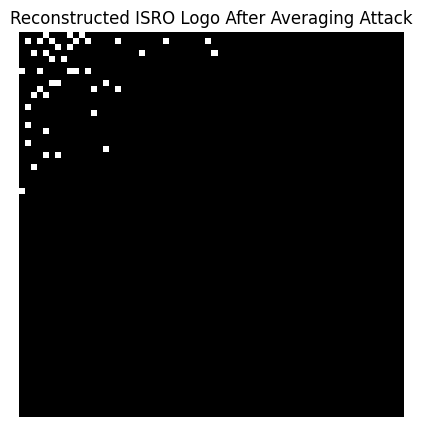

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

# Step 1: Compute 2D DCT of the averaged watermarked image
dct_avg = dct(dct(averaged_watermarked_A.T, norm='ortho').T, norm='ortho')

# Step 2: Extract 64×64 middle frequency region (where logo was embedded)
center_y, center_x = dct_avg.shape[0] // 2, dct_avg.shape[1] // 2
start_y, start_x = center_y - 32, center_x - 32
extracted_region = dct_avg[start_y:start_y+64, start_x:start_x+64]

# Step 3: Reconstruct logo using a threshold
threshold = 5  # Based on your embedding strength
reconstructed_logo = (extracted_region > threshold).astype(np.uint8) * 255

# Step 4: Display the reconstructed logo
plt.figure(figsize=(5, 5))
plt.imshow(reconstructed_logo, cmap='gray')
plt.title("Reconstructed ISRO Logo After Averaging Attack")
plt.axis('off')
plt.show()


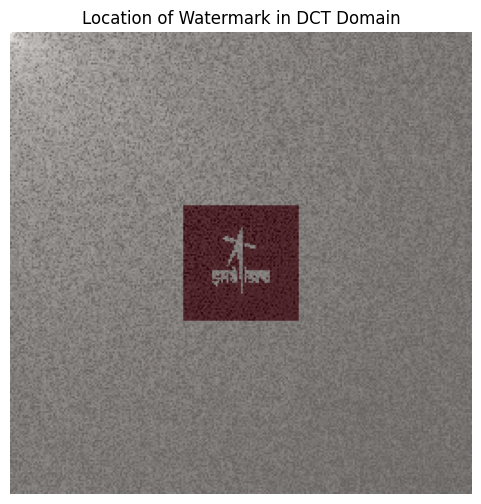

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Assume 'dct_2d' is the original DCT of the 256x256 image
# and 'embedded_A_DCT' is the one with the logo embedded

# Step 1: Compute the difference between original and embedded DCT
dct_diff = np.abs(embedded_A_DCT - dct_2d)

# Step 2: Create a mask of modified coefficients (non-zero difference)
modification_mask = (dct_diff > 0).astype(np.uint8)

# Step 3: Visualize the mask over DCT magnitude
plt.figure(figsize=(6, 6))
plt.imshow(np.log1p(np.abs(embedded_A_DCT)), cmap='gray')
plt.imshow(modification_mask * 255, cmap='Reds', alpha=0.4)  # Overlay in red
plt.title("Location of Watermark in DCT Domain")
plt.axis('off')
plt.show()


In [13]:
from scipy.fftpack import dct

# Take 2D DCT of the smoothed watermarked image
dct_smoothed = dct(dct(smoothed_watermarked.T, norm='ortho').T, norm='ortho')


In [14]:
# Get center of the DCT
center_y, center_x = dct_smoothed.shape[0] // 2, dct_smoothed.shape[1] // 2

# Extract embedded region
start_y, start_x = center_y - 32, center_x - 32
extracted_region = dct_smoothed[start_y:start_y + 64, start_x:start_x + 64]


In [15]:
# Threshold to reconstruct binary logo
threshold = 5  # Empirical; based on embedding strength used (10)
reconstructed_logo = (extracted_region > threshold).astype(np.uint8) * 255


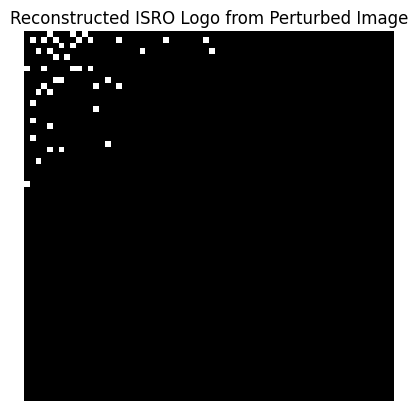

In [16]:
import matplotlib.pyplot as plt

plt.imshow(reconstructed_logo, cmap='gray')
plt.title("Reconstructed ISRO Logo from Perturbed Image")
plt.axis('off')
plt.show()


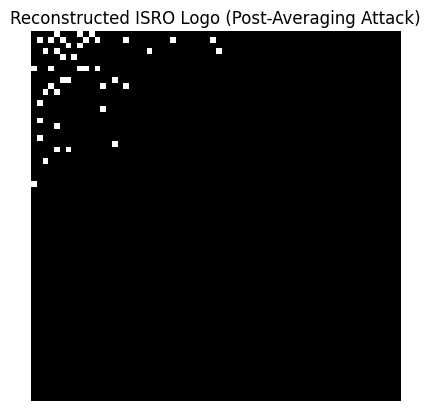

In [17]:
import matplotlib.pyplot as plt
from scipy.fftpack import dct

# 1. Compute 2D DCT of the smoothed watermarked image
dct_smoothed = dct(dct(smoothed_watermarked.T, norm='ortho').T, norm='ortho')

# 2. Extract the center 64x64 region
center_y, center_x = dct_smoothed.shape[0] // 2, dct_smoothed.shape[1] // 2
start_y, start_x = center_y - 32, center_x - 32
extracted_region = dct_smoothed[start_y:start_y+64, start_x:start_x+64]

# 3. Reconstruct the binary logo using a threshold
threshold = 5  # Adjust based on embedding strength (used 10 earlier)
reconstructed_logo = (extracted_region > threshold).astype(np.uint8) * 255

# 4. Display the logo
plt.imshow(reconstructed_logo, cmap='gray')
plt.title("Reconstructed ISRO Logo (Post-Averaging Attack)")
plt.axis('off')
plt.show()
